In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter

In [16]:
z = np.geomspace(5.0e+6,1.0e+4,10)
z

array([5000000.        , 2506596.61183863, 1256605.31489618,
        629960.52494744,  315811.38348507,  158322.34876475,
         79370.05259841,   39789.74098493,   19947.36598775,
         10000.        ])

In [10]:
colors = plt.colormaps['jet'].resampled(10)

In [7]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX


In [4]:
folder = 'Greens_func/PDE-non-linear/'
x = []
DT = []
DI_N = []
DI = []
DI_CMB = []
I = []
I_CMB = []
green= []

for i in range (10):
    file_path = os.path.join(folder, f"Dn.delta-z.k_00{i}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
    green.append(op)

    a = op.iloc[:, 0].values
    x.append(a)
    b = op.iloc[:, 4].values
    DT.append(b)
    c = op.iloc[:, 5].values
    DI.append(c)
    d = op.iloc[:, 12].values
    DI_CMB.append(d)
    e = op.iloc[:, 6].values
    DI_N.append(e)
    f = op.iloc[:, 10].values
    I_CMB.append(f)
    g= op.iloc[:, 11].values
    I.append(g) 


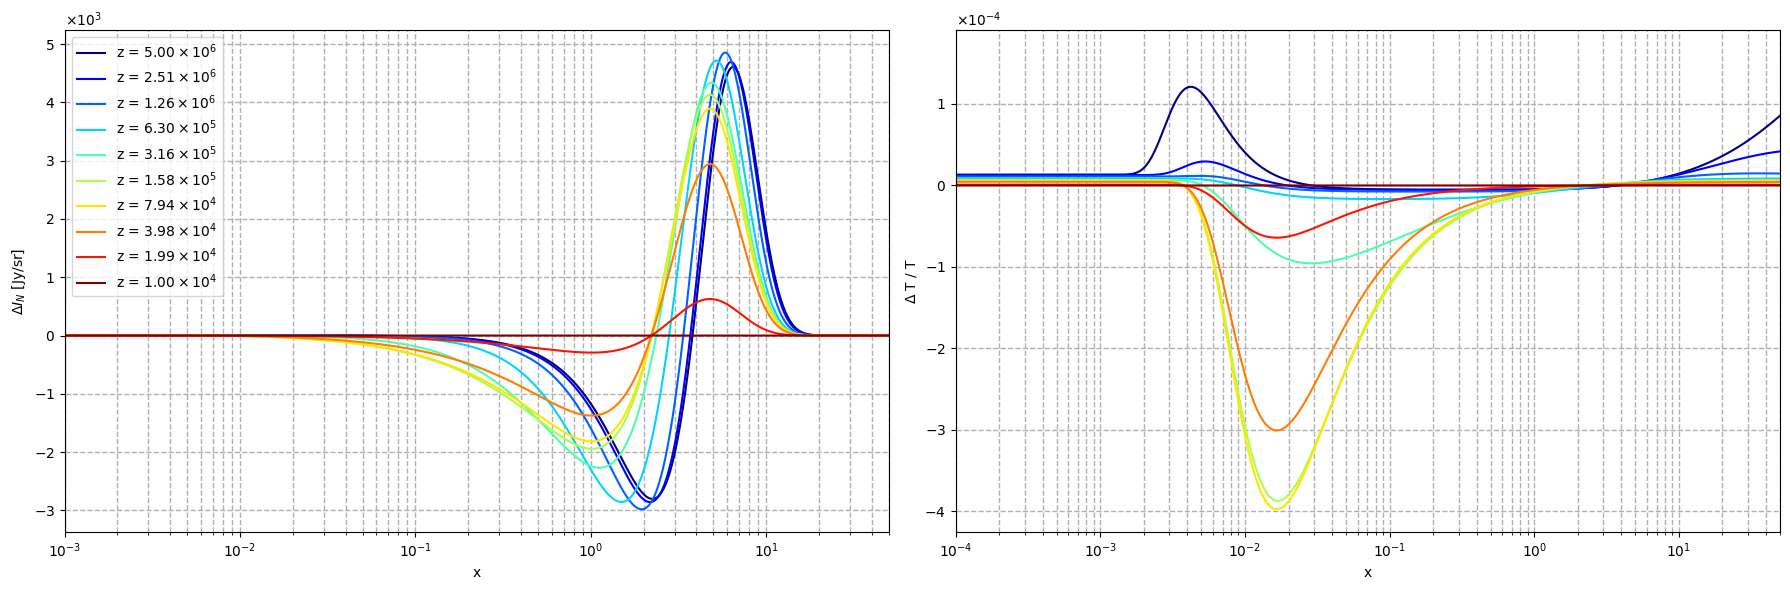

In [17]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
#fig.suptitle(f"Particle decay scenario ")

# Plot per DI_N2 (primo subplot)
for i in range(len(z)):
    ax1.plot(x[i], DI_N[i], label=f"z = {sci_notation(z[i])}", color = colors(i))

ax1.set_xscale('log')
ax1.set_xlim([1e-3, 50])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.legend()

# Plot per DT2 (secondo subplot)
for i in range(len(z)):
    ax2.plot(x[i], DT[i], color = colors(i))



ax2.set_xscale('log')
ax2.set_xlim([1e-4, 50])
#ax2.set_ylim([-2.3e-3, 1.1e-2])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("x")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()